In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
class StudentMRP:
    
    def __init__(self):
        self.S = ["class_1", "class_2", "class_3", "pub", "facebook", "pass", "sleep"]
        self.P = [[.0, .5, .0, .0, .5, .0, .0],
                  [.0, .0, .8, .0, .0, .0, .2],
                  [.0, .0, .0, .4, .0, .6, .0],
                  [.2, .4, .4, .0, .0, .0, .0],
                  [.1, .0, .0, .9, .0, .0, .0],
                  [.0, .0, .0, .0, .0, .0, 1.0],
                  [.0, .0, .0, .0, .0, .0, 1.0],
                 ]
        self.P = pd.DataFrame(self.P, index=self.S, columns=self.S)
        self.init_state = "class_1"
        self.terminal_state = "sleep"
        self.R = pd.Series([-2, -2, -2, 1, -1, 10, 0], index=self.S)
        #self.lambda_ = 0.1
        self.G = nx.from_pandas_adjacency(self.P, create_using=nx.DiGraph)
        
    def __str__(self):
        nx.draw(self.G, with_labels=True, node_size=3000)
        plt.show()
        return ""
    
    def generate_epsiodes(self, n=1000):
        episodes = []
        for _ in range(n):
            episode = [self.init_state]
            while self.terminal_state not in episode:
                current_state = episode[-1]
                next_state = np.random.choice(self.S, p=self.P.loc[current_state,:].values)
                episode.append(next_state)
            episodes.append(episode)
        return episodes

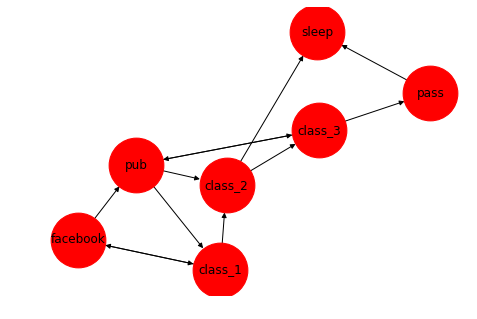

In [4]:
student_mrp = StudentMRP()
print(student_mrp)

In [5]:
# check episode generation
student_mrp.generate_epsiodes(3)

[['class_1', 'class_2', 'class_3', 'pub', 'class_3', 'pass', 'sleep'],
 ['class_1',
  'facebook',
  'pub',
  'class_2',
  'class_3',
  'pub',
  'class_3',
  'pub',
  'class_3',
  'pass',
  'sleep'],
 ['class_1', 'class_2', 'class_3', 'pass', 'sleep']]

In [6]:
student_mrp.G.nodes()

NodeView(('class_1', 'class_2', 'class_3', 'pub', 'facebook', 'pass', 'sleep'))

In [7]:
student_mrp.G.edges()

OutEdgeView([('class_1', 'class_2'), ('class_1', 'facebook'), ('class_2', 'class_3'), ('class_2', 'sleep'), ('class_3', 'pub'), ('class_3', 'pass'), ('pub', 'class_1'), ('pub', 'class_2'), ('pub', 'class_3'), ('facebook', 'class_1'), ('facebook', 'pub'), ('pass', 'sleep'), ('sleep', 'sleep')])

In [14]:
class LA_Agent:
        
    def __init__(self, mrp):
        self.mrp = mrp
        self.lambda_ = 0
        self.V = None
    
    def find_state_values(self):
        x = np.identity(len(self.mrp.S)) - self.lambda_*(self.mrp.P.values)
        try:
            x = np.linalg.inv(x)
        except:
            print("LA Agent failed :( \nTry iterative methods...")
            return None
        self.V = np.matmul(x, self.mrp.R.values.reshape(-1, 1)).flatten()
        self.V = pd.Series(self.V, index=self.mrp.S)
        return self.V

In [15]:
la_agent = LA_Agent(mrp=student_mrp)
print(la_agent.find_state_values())

class_1     -2.0
class_2     -2.0
class_3     -2.0
pub          1.0
facebook    -1.0
pass        10.0
sleep        0.0
dtype: float64


In [ ]:
class Sampler_Agent:
    
    def __init__(self):
        